In [5]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

<h3>Data Importing</h3>

In [6]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-'+
'databases/balance-scale/balance-scale.data')

In [7]:
df.head(5)

,B,1,1.1,1.2,1.3
0,R,1,1,1,2
1,R,1,1,1,3
2,R,1,1,1,4
3,R,1,1,1,5
4,R,1,1,2,1


In [8]:
df.shape

(624, 5)

In [9]:
x = df.values[:,1:5]
y = df.values[:,0]

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=100)

<h3>Decision Tree using GINI index</h3>

In [14]:
clf_gini = DecisionTreeClassifier(criterion='gini',
                                  random_state=100)

In [15]:
clf_gini.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

<h3>Prediction</h3>

In [16]:
y_pred = clf_gini.predict(x_test)

In [22]:
y_pred=pd.Series(y_pred)

In [29]:
pd.DataFrame({'X_test':df['B'],'Y_pred':y_pred}).head(5)

,X_test,Y_pred
0,R,R
1,R,L
2,R,R
3,R,L
4,R,R


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
cf = confusion_matrix(y_test,y_pred)

<h3>Confusion Metrix</h3>

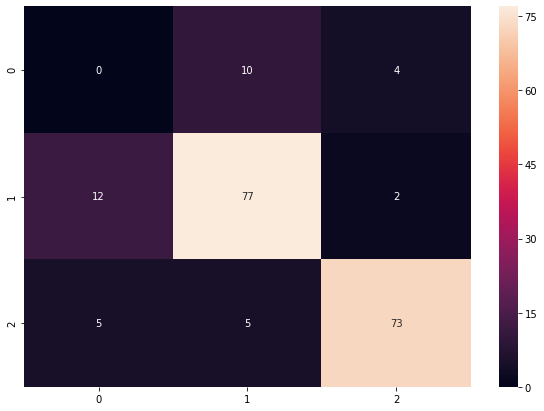

In [32]:
plt.figure(figsize=(10,7))
sns.heatmap(cf,annot=True)

In [33]:
print('accuracy :',accuracy_score(y_test,y_pred))

accuracy : 0.7978723404255319


In [34]:
from sklearn import tree

[Text(129.30576923076924, 209.07692307692307, 'X[2] <= 2.5\nentropy = 0.569\nsamples = 436\nvalue = [34, 197, 205]'),
 Text(53.29615384615385, 192.35076923076923, 'X[1] <= 1.5\nentropy = 0.443\nsamples = 167\nvalue = [10, 118, 39]'),
 Text(30.76153846153846, 175.62461538461537, 'X[0] <= 4.5\nentropy = 0.531\nsamples = 31\nvalue = [3, 9, 19]'),
 Text(21.461538461538463, 158.89846153846153, 'X[3] <= 2.5\nentropy = 0.42\nsamples = 23\nvalue = [3, 3, 17]'),
 Text(11.446153846153846, 142.1723076923077, 'X[2] <= 1.5\nentropy = 0.642\nsamples = 9\nvalue = [2, 3, 4]'),
 Text(5.723076923076923, 125.44615384615385, 'X[0] <= 2.0\nentropy = 0.375\nsamples = 4\nvalue = [0, 3, 1]'),
 Text(2.8615384615384616, 108.72, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(8.584615384615384, 108.72, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3, 0]'),
 Text(17.16923076923077, 125.44615384615385, 'X[0] <= 3.5\nentropy = 0.48\nsamples = 5\nvalue = [2, 0, 3]'),
 Text(14.307692307692308, 108.72, 'X[3] <= 1.5

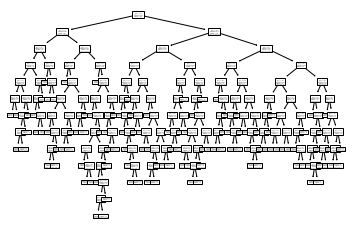

In [35]:
tree.plot_tree(clf_gini.fit(x_train,y_train))